In [1]:
import numpy as np
import matplotlib.pyplot as plt
import response_functions as rf

In [2]:
gr = rf.Massless_Dirac_Fermions(
    hv=0.658, density=1e-2, temperature=0.026, degeneracy=4, maldague_num=251
)

0.1772453850905516
0.11662746338958296


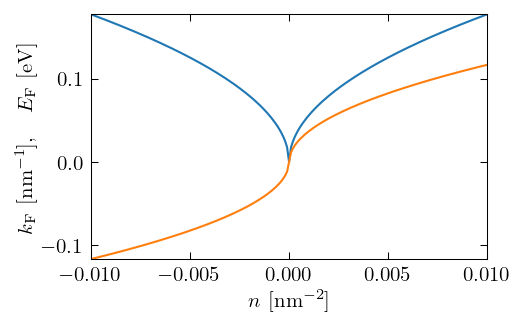

In [3]:
density = np.linspace(-1e-2, 1e-2, 201)
print(gr.compute_fermi_wavevector(1e-2))
print(gr.compute_fermi_energy(1e-2))
plt.plot(density, gr.compute_fermi_wavevector(density))
plt.plot(density, gr.compute_fermi_energy(density))
plt.xlabel(r"$n~[{\rm nm^{-2}}]$")
plt.ylabel(r"$k_{\rm F}~[{\rm nm^{-1}}],\quad E_{\rm F}~[{\rm eV}]$");

In [4]:
gr.compute_density(chemical_potential=-0.1, temperature=0.026)

-0.008944659174471405

In [5]:
gr.compute_chemical_potential(density=-0.008944659174471405, temperature=0.026)

-0.09999999999999477

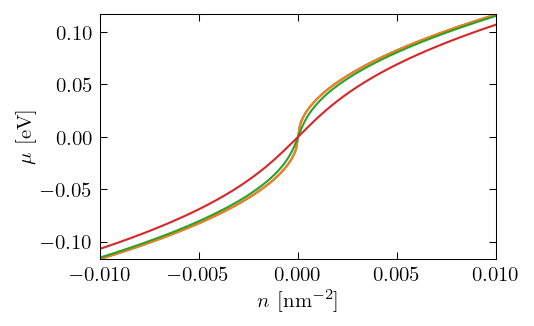

In [6]:
for t in [0, 0.001, 0.010, 0.026]:
    plt.plot(
        density,
        [gr.compute_chemical_potential(density=d, temperature=t) for d in density],
    )
plt.ylabel(r"$\mu ~[{\rm eV}]$")
plt.xlabel(r"$n~[{\rm nm^{-2}}]$");

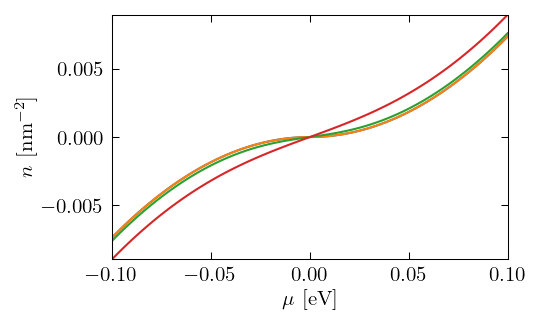

In [7]:
mu = np.linspace(-0.1, 0.1, 100)
for t in [0, 0.001, 0.010, 0.026]:
    plt.plot(mu, [gr.compute_density(chemical_potential=m, temperature=t) for m in mu])
plt.xlabel(r"$\mu ~[{\rm eV}]$")
plt.ylabel(r"$n~[{\rm nm^{-2}}]$");

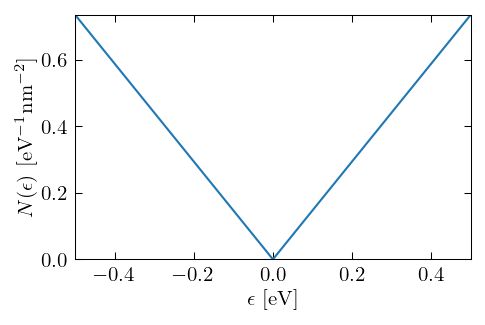

In [8]:
energy = np.linspace(-0.5, 0.5, 201)
plt.plot(energy, gr.dos(energy))
plt.xlabel(r"$\epsilon ~[{\rm eV}]$")
plt.ylabel(r"$N(\epsilon) ~[{\rm eV^{-1}nm^{-2}}]$");

In [9]:
q = np.linspace(0, 3 * gr.kf, 200)
omega = np.linspace(0, 3 * gr.ef, 200)
chi = gr.polarization(q=q, omega=omega)

C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\massless_dirac_fermions.py:187: RuntimeWarning: divide by zero encountered in divide
  Dplus = (omega / self._hv + 2.0 * kf) / q
C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\massless_dirac_fermions.py:188: RuntimeWarning: divide by zero encountered in divide
  Dminus = (omega / self._hv - 2.0 * kf) / q
C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\massless_dirac_fermions.py:190: RuntimeWarning: divide by zero encountered in divide
  it1 = 8.0 * kf / (self._hv * q**2)
C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\massless_dirac_fermions.py:170: RuntimeWarning: invalid value encountered in multiply
  sz2m1 = np.sqrt(z - 1.0) * np.sqrt(z + 1.0)
C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\massless_dirac_fermions.py:171: Runti

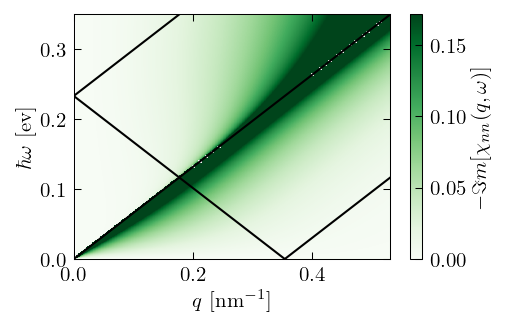

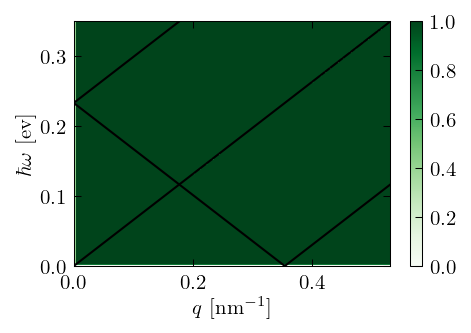

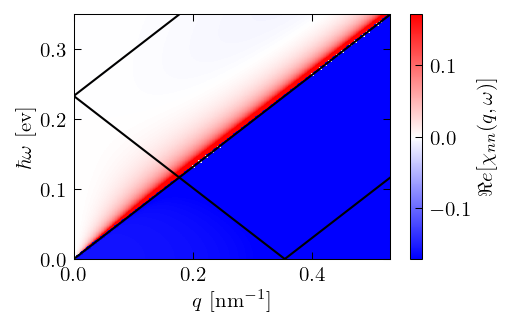

In [10]:
plt.imshow(
    -np.imag(chi).T,
    vmin=0,
    vmax=gr.dos(gr.ef),
    cmap="Greens",
    extent=(q[0], q[-1], omega[0], omega[-1]),
)
plt.ylim(omega[0], omega[-1])
plt.plot(q, gr.hv * q, "k")
plt.plot(q, gr.hv * (q - 2 * gr.kf), "k")
plt.plot(q, gr.hv * (q + 2 * gr.kf), "k")
plt.plot(q, 2 * gr.ef - gr.hv * q, "k")
plt.xlabel(r"$q~[{\rm nm^{-1}}]$")
plt.ylabel(r"$\hbar\omega~[{\rm ev}]$")
c = plt.colorbar()
c.set_label(r"$-\Im m[\chi_{nn}(q,\omega)]$")

plt.figure()
plt.imshow(
    -np.imag(chi).T > 1e-12,
    vmin=0,
    vmax=1,
    cmap="Greens",
    extent=(q[0], q[-1], omega[0], omega[-1]),
)
plt.ylim(omega[0], omega[-1])
plt.plot(q, gr.hv * q, "k")
plt.plot(q, gr.hv * (q - 2 * gr.kf), "k")
plt.plot(q, gr.hv * (q + 2 * gr.kf), "k")
plt.plot(q, 2 * gr.ef - gr.hv * q, "k")
plt.xlabel(r"$q~[{\rm nm^{-1}}]$")
plt.ylabel(r"$\hbar\omega~[{\rm ev}]$")
plt.colorbar()

plt.figure()
plt.imshow(
    np.real(chi).T,
    vmin=-gr.dos(gr.ef),
    vmax=gr.dos(gr.ef),
    cmap="bwr",
    extent=(q[0], q[-1], omega[0], omega[-1]),
)
plt.ylim(omega[0], omega[-1])
plt.plot(q, gr.hv * q, "k")
plt.plot(q, gr.hv * (q - 2 * gr.kf), "k")
plt.plot(q, gr.hv * (q + 2 * gr.kf), "k")
plt.plot(q, 2 * gr.ef - gr.hv * q, "k")
plt.xlabel(r"$q~[{\rm nm^{-1}}]$")
plt.ylabel(r"$\hbar\omega~[{\rm ev}]$")
c = plt.colorbar()
c.set_label(r"$\Re e[\chi_{nn}(q,\omega)]$")

In [11]:
chi_nn = gr.chi_nn(q=q, omega=omega, gamma=0.005)

C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\massless_dirac_fermions.py:171: RuntimeWarning: invalid value encountered in log
  return z * sz2m1 - np.log(z + sz2m1)
C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\massless_dirac_fermions.py:240: RuntimeWarning: invalid value encountered in divide
  return (omega + 1j * gamma) / (omega / chi1 + 1j * gamma / chi2)


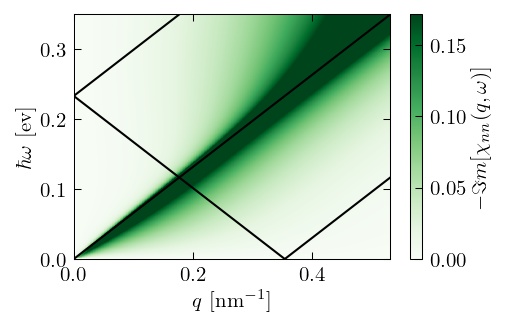

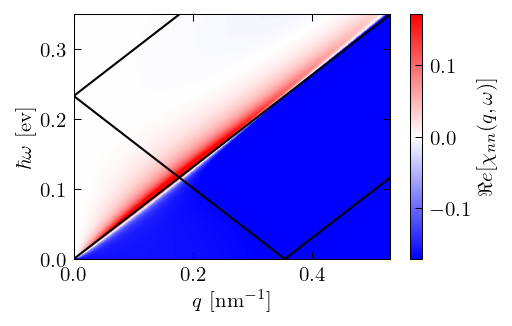

In [12]:
plt.imshow(
    -np.imag(chi_nn).T,
    vmin=0,
    vmax=gr.dos(gr.ef),
    cmap="Greens",
    extent=(q[0], q[-1], omega[0], omega[-1]),
)
plt.ylim(omega[0], omega[-1])
plt.plot(q, gr.hv * q, "k")
plt.plot(q, gr.hv * (q - 2 * gr.kf), "k")
plt.plot(q, 2 * gr.ef - gr.hv * q, "k")
plt.plot(q, gr.hv * (q + 2 * gr.kf), "k")
plt.xlabel(r"$q~[{\rm nm^{-1}}]$")
plt.ylabel(r"$\hbar\omega~[{\rm ev}]$")
c = plt.colorbar()
c.set_label(r"$-\Im m[\chi_{nn}(q,\omega)]$")
plt.figure()
plt.imshow(
    np.real(chi_nn).T,
    vmin=-gr.dos(gr.ef),
    vmax=gr.dos(gr.ef),
    cmap="bwr",
    extent=(q[0], q[-1], omega[0], omega[-1]),
)
plt.ylim(omega[0], omega[-1])
plt.plot(q, gr.hv * q, "k")
plt.plot(q, gr.hv * (q - 2 * gr.kf), "k")
plt.plot(q, gr.hv * (q + 2 * gr.kf), "k")
plt.plot(q, 2 * gr.ef - gr.hv * q, "k")
plt.xlabel(r"$q~[{\rm nm^{-1}}]$")
plt.ylabel(r"$\hbar\omega~[{\rm ev}]$")
c = plt.colorbar()
c.set_label(r"$\Re e[\chi_{nn}(q,\omega)]$")

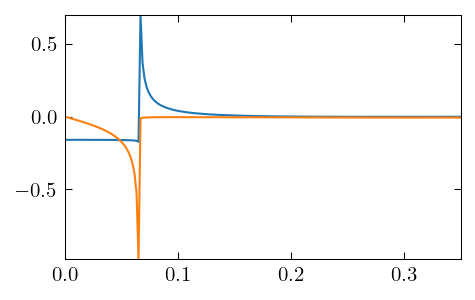

In [13]:
plt.plot(omega, np.real(gr.polarization(q=0.1, omega=omega)))
plt.plot(omega, np.imag(gr.polarization(q=0.1, omega=omega)))

C:\Users\itorre\AppData\Local\pypoetry\Cache\virtualenvs\response-functions-DAeVIpnW-py3.11\Lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, '$-\\chi_{nn}(q,\\omega=0)/N(\\mu)$')

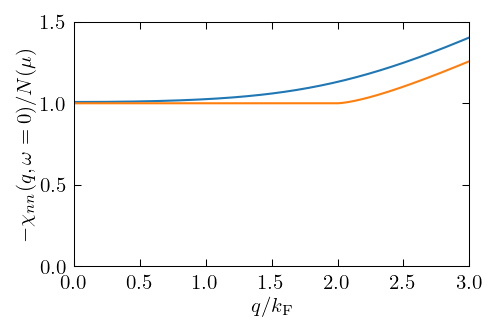

In [14]:
plt.plot(q / gr.kf, -gr.polarization(q=q, omega=0) / gr.dos(gr.chemical_potential))
plt.plot(q / gr.kf, -gr.polarization(q=q, omega=0, temperature=0) / gr.dos(gr.ef))
plt.xlim(0, 3)
plt.ylim(0, 1.5)
plt.xlabel(r"$q/k_{\rm F}$")
plt.ylabel(r"$-\chi_{nn}(q,\omega=0)/N(\mu)$")

C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\massless_dirac_fermions.py:317: RuntimeWarning: divide by zero encountered in divide
  intraband = 1j / 4.0 * abs(ef) / (omega + 1j * gamma)
C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\massless_dirac_fermions.py:317: RuntimeWarning: invalid value encountered in divide
  intraband = 1j / 4.0 * abs(ef) / (omega + 1j * gamma)
C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\massless_dirac_fermions.py:328: RuntimeWarning: invalid value encountered in multiply
  return (intraband + interband) * self._degeneracy


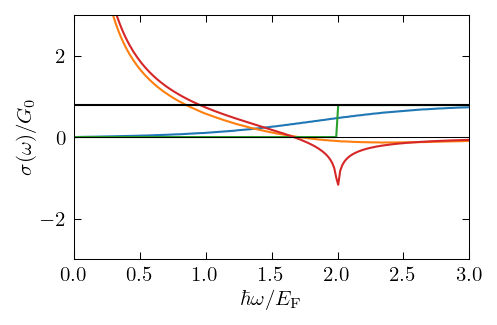

In [15]:
plt.plot(omega / gr.ef, np.real(gr.conductivity(omega, gamma=0.0, temperature=0.026)))
plt.plot(omega / gr.ef, np.imag(gr.conductivity(omega, gamma=0.0, temperature=0.026)))
plt.plot(omega / gr.ef, np.real(gr.conductivity(omega, gamma=0.0, temperature=0.0)))
plt.plot(omega / gr.ef, np.imag(gr.conductivity(omega, gamma=0.0, temperature=0.0)))
plt.plot(omega / gr.ef, np.ones_like(omega) * np.pi / 4, "k")
plt.plot(omega / gr.ef, np.zeros_like(omega), "k", lw=0.5)
plt.ylim(-3, 3)
plt.xlabel(r"$\hbar\omega/E_{\rm F}$")
plt.ylabel(r"$\sigma(\omega)/G_0$");

## Check behaviour for imaginary omega using expression by Borghi

C:\Users\itorre\AppData\Local\Temp\ipykernel_2636\1794253735.py:11: RuntimeWarning: divide by zero encountered in divide
  np.arcsin((2 * abs(ef) + 1j * omega) / (hv * q))
C:\Users\itorre\AppData\Local\Temp\ipykernel_2636\1794253735.py:12: RuntimeWarning: divide by zero encountered in divide
  + (2 * abs(ef) + 1j * omega)
C:\Users\itorre\AppData\Local\Temp\ipykernel_2636\1794253735.py:14: RuntimeWarning: divide by zero encountered in divide
  * np.sqrt(1 - (2 * abs(ef) + 1j * omega) ** 2 / (hv * q) ** 2)
C:\Users\itorre\AppData\Local\Temp\ipykernel_2636\1794253735.py:12: RuntimeWarning: invalid value encountered in multiply
  + (2 * abs(ef) + 1j * omega)
C:\Users\itorre\AppData\Local\Temp\ipykernel_2636\1794253735.py:6: RuntimeWarning: invalid value encountered in multiply
  + 0.5


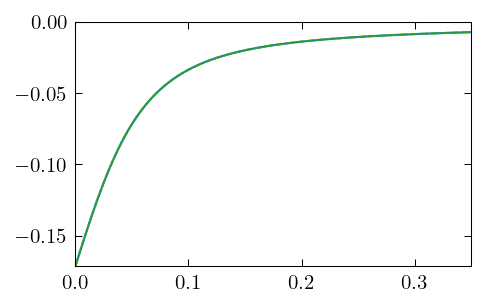

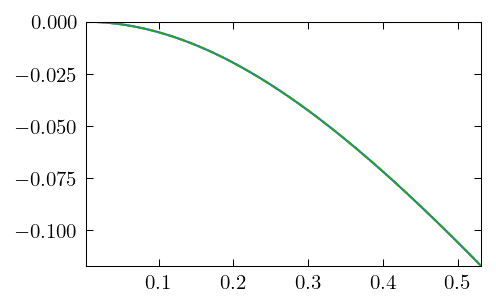

In [16]:
def f(q, omega, ef, hv):
    # g =4
    return (
        -2 * abs(ef) / (np.pi * hv**2)
        - 0.25 * q**2 / np.sqrt(omega**2 + q**2 * hv**2)
        + 0.5
        / np.pi
        * q**2
        / np.sqrt(omega**2 + q**2 * hv**2)
        * np.real(
            np.arcsin((2 * abs(ef) + 1j * omega) / (hv * q))
            + (2 * abs(ef) + 1j * omega)
            / (hv * q)
            * np.sqrt(1 - (2 * abs(ef) + 1j * omega) ** 2 / (hv * q) ** 2)
        )
    )


plt.figure()
plt.plot(omega, np.real(gr.polarization(q=0.1, omega=1.0j * omega, temperature=0)))
plt.plot(omega, np.imag(gr.polarization(q=0.1, omega=1.0j * omega, temperature=0)))
plt.plot(omega, f(q=0.1, omega=omega, ef=gr.ef, hv=gr.hv), "--")
plt.figure()
plt.plot(q, np.real(gr.polarization(q=q, omega=0.5 * 1.0j, temperature=0)))
plt.plot(q, np.imag(gr.polarization(q=q, omega=0.5 * 1.0j, temperature=0)))
plt.plot(q, f(q=q, omega=0.5, ef=gr.ef, hv=gr.hv), "--")

## Transverse response

C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\massless_dirac_fermions.py:272: RuntimeWarning: divide by zero encountered in divide
  Dplus = (omega / self._hv + 2.0 * kf) / q
C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\massless_dirac_fermions.py:273: RuntimeWarning: divide by zero encountered in divide
  Dminus = (omega / self._hv - 2.0 * kf) / q
C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\massless_dirac_fermions.py:275: RuntimeWarning: divide by zero encountered in divide
  it1 = 8.0 * kf / (self._hv * q**2) * omega**2
C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\massless_dirac_fermions.py:275: RuntimeWarning: invalid value encountered in multiply
  it1 = 8.0 * kf / (self._hv * q**2) * omega**2
C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\massless_dirac_fermions.

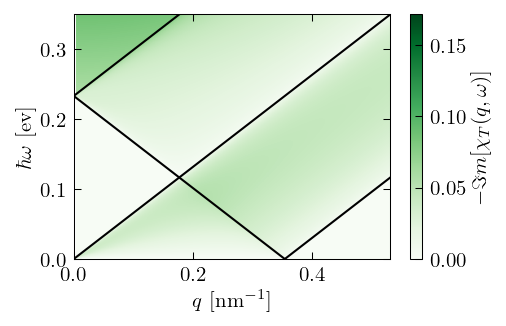

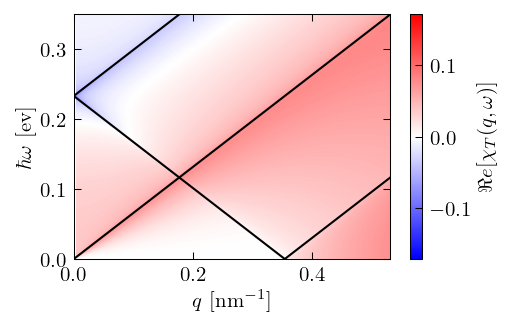

In [17]:
chi_t = gr.chi_T(q=q, omega=omega, temperature=0)

plt.imshow(
    -np.imag(chi_t).T,
    vmin=0,
    vmax=gr.dos(gr.ef),
    cmap="Greens",
    extent=(q[0], q[-1], omega[0], omega[-1]),
)
plt.ylim(omega[0], omega[-1])
plt.plot(q, gr.hv * q, "k")
plt.plot(q, gr.hv * (q - 2 * gr.kf), "k")
plt.plot(q, gr.hv * (q + 2 * gr.kf), "k")
plt.plot(q, 2 * gr.ef - gr.hv * q, "k")
plt.xlabel(r"$q~[{\rm nm^{-1}}]$")
plt.ylabel(r"$\hbar\omega~[{\rm ev}]$")
c = plt.colorbar()
c.set_label(r"$-\Im m[\chi_{T}(q,\omega)]$")
plt.figure()
plt.imshow(
    np.real(chi_t).T,
    vmin=-gr.dos(gr.ef),
    vmax=gr.dos(gr.ef),
    cmap="bwr",
    extent=(q[0], q[-1], omega[0], omega[-1]),
)
plt.ylim(omega[0], omega[-1])
plt.plot(q, gr.hv * q, "k")
plt.plot(q, gr.hv * (q - 2 * gr.kf), "k")
plt.plot(q, gr.hv * (q + 2 * gr.kf), "k")
plt.plot(q, 2 * gr.ef - gr.hv * q, "k")
plt.xlabel(r"$q~[{\rm nm^{-1}}]$")
plt.ylabel(r"$\hbar\omega~[{\rm ev}]$")
c = plt.colorbar()
c.set_label(r"$\Re e[\chi_{T}(q,\omega)]$")

## Longitudinal response

C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\massless_dirac_fermions.py:246: RuntimeWarning: divide by zero encountered in divide
  return np.squeeze(omega_**2 / q_**2) * self.polarization(
C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\massless_dirac_fermions.py:246: RuntimeWarning: invalid value encountered in divide
  return np.squeeze(omega_**2 / q_**2) * self.polarization(


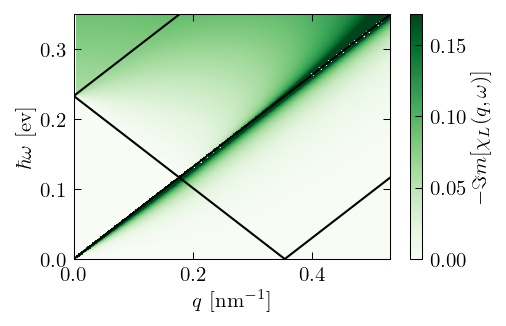

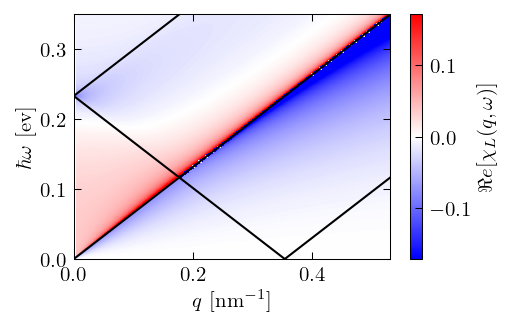

In [18]:
chi_L = gr.chi_L(q=q, omega=omega, temperature=0)

plt.imshow(
    -np.imag(chi_L).T,
    vmin=0,
    vmax=gr.dos(gr.ef),
    cmap="Greens",
    extent=(q[0], q[-1], omega[0], omega[-1]),
)
plt.ylim(omega[0], omega[-1])
plt.plot(q, gr.hv * q, "k")
plt.plot(q, gr.hv * (q - 2 * gr.kf), "k")
plt.plot(q, gr.hv * (q + 2 * gr.kf), "k")
plt.plot(q, 2 * gr.ef - gr.hv * q, "k")
plt.xlabel(r"$q~[{\rm nm^{-1}}]$")
plt.ylabel(r"$\hbar\omega~[{\rm ev}]$")
c = plt.colorbar()
c.set_label(r"$-\Im m[\chi_{L}(q,\omega)]$")
plt.figure()
plt.imshow(
    np.real(chi_L).T,
    vmin=-gr.dos(gr.ef),
    vmax=gr.dos(gr.ef),
    cmap="bwr",
    extent=(q[0], q[-1], omega[0], omega[-1]),
)
plt.ylim(omega[0], omega[-1])
plt.plot(q, gr.hv * q, "k")
plt.plot(q, gr.hv * (q - 2 * gr.kf), "k")
plt.plot(q, gr.hv * (q + 2 * gr.kf), "k")
plt.plot(q, 2 * gr.ef - gr.hv * q, "k")
plt.xlabel(r"$q~[{\rm nm^{-1}}]$")
plt.ylabel(r"$\hbar\omega~[{\rm ev}]$")
c = plt.colorbar()
c.set_label(r"$\Re e[\chi_{L}(q,\omega)]$")

## Static response

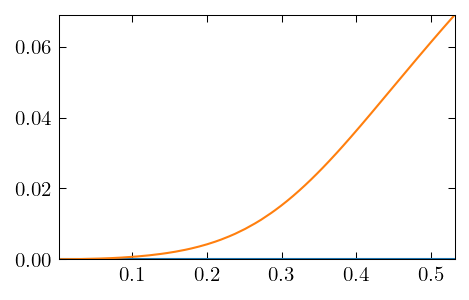

In [19]:
plt.plot(q, gr.chi_L(q=q, omega=0))
plt.plot(q, gr.chi_T(q=q, omega=0))

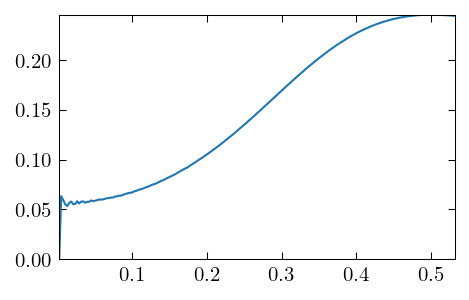

In [20]:
plt.plot(q, gr.chi_T(q=q, omega=0) / q**2)

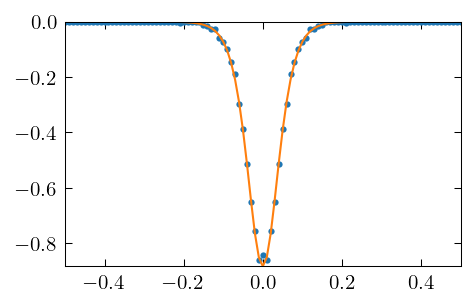

In [21]:
q_small = gr.temperature / gr.hv / 5
gr.temperature = 0.026
mu_vals = np.linspace(-0.5, 0.5, 101)
plt.plot(
    mu_vals,
    [
        -gr.chi_T(q=q_small, omega=0, chemical_potential=mu) / q_small**2
        for mu in mu_vals
    ],
    "o",
)

plt.plot(
    mu_vals,
    -gr.degeneracy
    * gr.hv**2
    / (6 * np.pi)
    * 1
    / (4 * gr.temperature * np.cosh(mu_vals / (2 * gr.temperature)) ** 2),
)

## Conductivity

C:\Users\itorre\AppData\Local\Temp\ipykernel_2636\4074120184.py:5: RuntimeWarning: divide by zero encountered in divide
  st = 1j * np.pi / omega * gr.chi_T(q=q, omega=omega + 1j * gamma)
C:\Users\itorre\AppData\Local\Temp\ipykernel_2636\4074120184.py:5: RuntimeWarning: invalid value encountered in divide
  st = 1j * np.pi / omega * gr.chi_T(q=q, omega=omega + 1j * gamma)
C:\Users\itorre\AppData\Local\Temp\ipykernel_2636\4074120184.py:5: RuntimeWarning: invalid value encountered in multiply
  st = 1j * np.pi / omega * gr.chi_T(q=q, omega=omega + 1j * gamma)


(-3.0, 3.0)

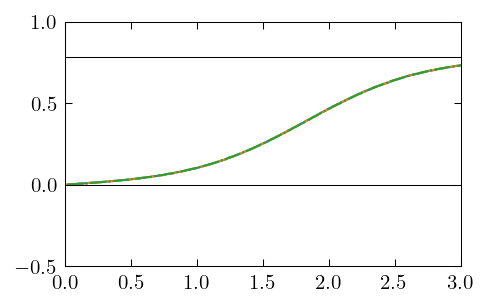

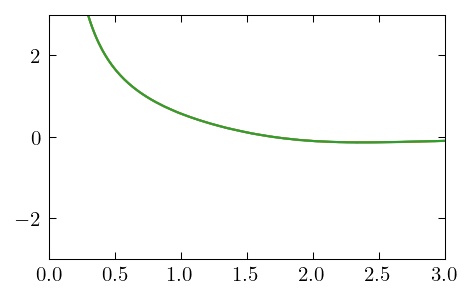

In [22]:
q = 0.001
gamma = 0.0
# sl = 1j*np.pi/q**2 * omega* gr.chi_nn(q=q, omega=omega,gamma=gamma, temperature=0)
sl = 1j * np.pi / q**2 * omega * gr.polarization(q=q, omega=omega + 1j * gamma)
st = 1j * np.pi / omega * gr.chi_T(q=q, omega=omega + 1j * gamma)
s = gr.conductivity(omega=omega, gamma=gamma)
plt.figure()
plt.plot(omega / gr.ef, np.real(s))
plt.plot(omega / gr.ef, np.real(sl), "--")
plt.plot(omega / gr.ef, np.real(st), "-.")
plt.plot(omega / gr.ef, np.ones_like(omega) * np.pi / 4, "k", lw=0.5)
plt.plot(omega / gr.ef, np.zeros_like(omega), "k", lw=0.5)
plt.ylim(-0.5, 1)

plt.figure()
plt.plot(omega / gr.ef, np.imag(s))
plt.plot(omega / gr.ef, np.imag(sl))
plt.plot(omega / gr.ef, np.imag(st))
plt.ylim(-3, 3)

## Sigma at finite temperature without Maldague

In [23]:
import scipy.integrate as itg


def H(f, w):
    sw = np.sinh(w)
    cw = np.cosh(w)
    cf = np.cosh(f)
    return (
        itg.quad(
            lambda x: (np.tanh(x) / (cf / np.cosh(x) + 1) - sw / (cf + cw))
            / (w**2 - x**2),
            0,
            w,
        )[0]
        + itg.quad(
            lambda x: (np.tanh(x) / (cf / np.cosh(x) + 1) - sw / (cf + cw))
            / (w**2 - x**2),
            w,
            np.inf,
        )[0]
    )